# What drives the price of a car? 
---
Andre Londono Section E

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 



The objective from a business data problem perspective is to perform a **predictive analysis** on the provided dataset of 426K used cars to identify the **key factors influencing car prices**. This involves:

1. **Data Understanding**: Analyzing the dataset to comprehend the features available, such as car make, model, year, mileage, condition, and other relevant attributes.
2. **Data Preparation**: Cleaning and preprocessing the data to handle missing values, outliers, and ensuring the data is suitable for modeling.
3. **Modeling**: Applying various **regression techniques** to build models that predict car prices based on the identified features.
4. **Evaluation**: Assessing the performance of the models using appropriate metrics (e.g., RMSE, MAE) to determine the most accurate model.
5. **Deployment**: Providing actionable insights and recommendations to the used car dealership based on the model's findings, highlighting the features that significantly impact car prices.

This approach will help translate the business goal into a structured data analysis task, ensuring a clear path from data exploration to actionable business insights.

For example this could help the business with

**Pricing Strategy**: By understanding the key factors that influence car prices, the business can set more competitive and accurate prices for their inventory, attracting more customers and increasing sales.

**Inventory Management**: Insights from the model can help the business identify which types of cars (e.g., specific models, conditions, or features) are likely to fetch higher prices. This can guide purchasing decisions and inventory stocking.

**Market Analysis**: The model can reveal regional price variations and trends, enabling the business to tailor their marketing and sales strategies to different markets.

**Customer Insights**: Understanding what drives car prices can also provide valuable information about customer preferences and behaviors, helping the business to better meet customer needs and improve satisfaction.

**Operational Efficiency**: Automating the pricing process with a predictive model can save time and reduce human error, leading to more efficient operations.

Overall, leveraging data to inform pricing and inventory decisions can lead to increased profitability, better customer satisfaction, and a stronger competitive position in the market.

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

# Libraries used in this notebook

The following packages enable a wide range of opportunities related to time series analysis, statistical modeling, data visualization, and machine learning. Here's a breakdown of what each package can help with:

## Time Series Analysis and Forecasting
- **`statsmodels.tsa.seasonal`**: Decompose time series data into seasonal, trend, and residual components.
- **`statsmodels.tsa.arima.model`**: Build and fit ARIMA models for time series forecasting.
- **`statsmodels.tsa.stattools`**: Perform statistical tests like the Augmented Dickey-Fuller test for stationarity.
- **`statsmodels.tsa.statespace.sarimax`**: Fit SARIMAX models for seasonal time series forecasting.
- **`statsmodels.graphics.tsaplots`**: Plot autocorrelation and partial autocorrelation functions.
- **`statsmodels.tsa.forecasting.stl`**: Use STL decomposition for forecasting.

## Machine Learning
- **`sklearn.model_selection`**: Split data into training and testing sets, perform cross-validation.
- **`sklearn.linear_model`**: Implement linear models like Linear Regression, Ridge, and Lasso.
- **`sklearn.ensemble`**: Use ensemble methods like Random Forest for regression and classification.
- **`sklearn.metrics`**: Evaluate model performance using metrics like mean squared error, mean absolute error, and R² score.
- **`sklearn.preprocessing`**: Preprocess data using techniques like one-hot encoding, polynomial features, and standard scaling.
- **`sklearn.compose`**: Combine different preprocessing steps using column transformers.
- **`sklearn.inspection`**: Assess feature importance using permutation importance.
- **`sklearn.pipeline`**: Create pipelines to streamline the process of building and evaluating models.

In [2]:
data=pd.read_csv('data/vehicles.csv')

print('Vehicles DF Shape :',data.shape)
pd.set_option('display.max_columns', None)
data.head()

Vehicles DF Shape : (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
#Some steps I will take to get familiar is use describe function, info function, graph the data and figure out where the outlierS are
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Interpretation of Statistical results**
1. id
Count: 426,880 values.
Mean: 7,311,487,000.
Standard Deviation (std): 4,473,170.
Min: 7,207,408,000.
25% (Q1): 7,308,143,000.
50% (Median): 7,312,621,000.
75% (Q3): 7,315,254,000.
Max: 7,317,010,000.
Observation: The id values are tightly clustered, indicating they serve as unique identifiers and are not meaningful numerically.

2. price
Count: 426,880 values.
Mean: 7,519,930.24.
Standard Deviation (std): 12,182,280.16.
Min: 0.00 (indicates missing or zero-priced entries).
25% (Q1): 59,000.00.
50% (Median): 1,395,000.00.
75% (Q3): 2,648,750.00.
Max: 37,369,290.00.
Observation: The price variable has high variability, with many low-priced items but a few extremely high-priced outliers.

3. year
Count: 425,675 values.
Mean: 2011.24.
Standard Deviation (std): 9.45.
Min: 1900 (potential erroneous or placeholder values).
25% (Q1): 2008.
50% (Median): 2013.
75% (Q3): 2017.
Max: 2022.
Observation: Most vehicles are relatively recent (post-2000), with a concentration in the 2008–2022 range. The minimum value suggests possible data entry errors.

4. odometer
Count: 422,480 values.
Mean: 98,043.35 miles.
Standard Deviation (std): 213,881.51 miles.
Min: 0.00 miles (likely indicates unused or missing data).
25% (Q1): 37,700.00 miles.
50% (Median): 85,540.00 miles.
75% (Q3): 133,542.00 miles.
Max: 10,000,000.00 miles (likely a data entry error).
Observation: The odometer variable shows high variability, with some unusually high outliers. Most vehicles have mileage between 37,700 and 133,542 miles.



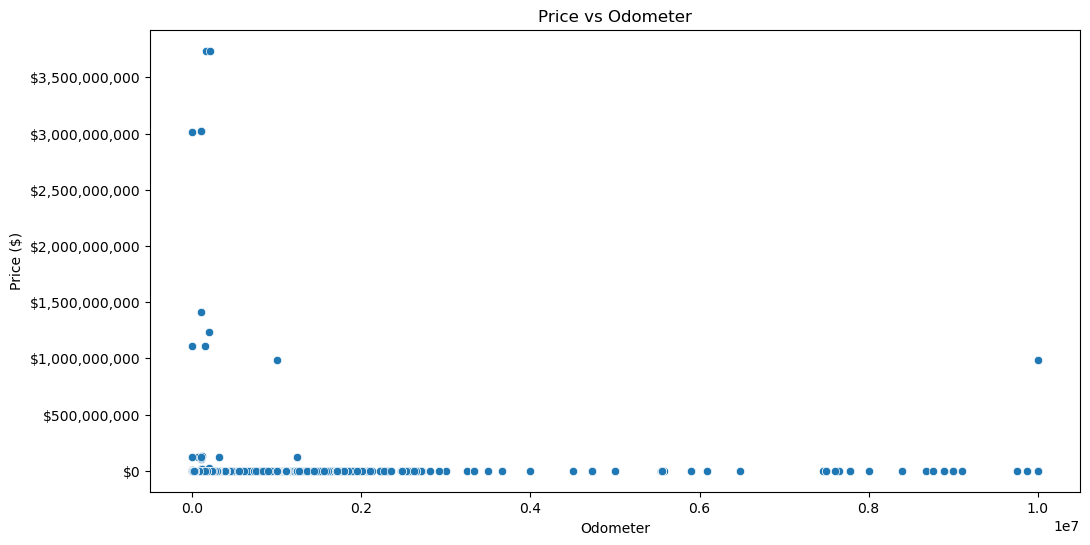

In [4]:
#To get an idea of the data I will create scatter plot to visualize the trend of price vs odometer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='price', data=data)
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.show()



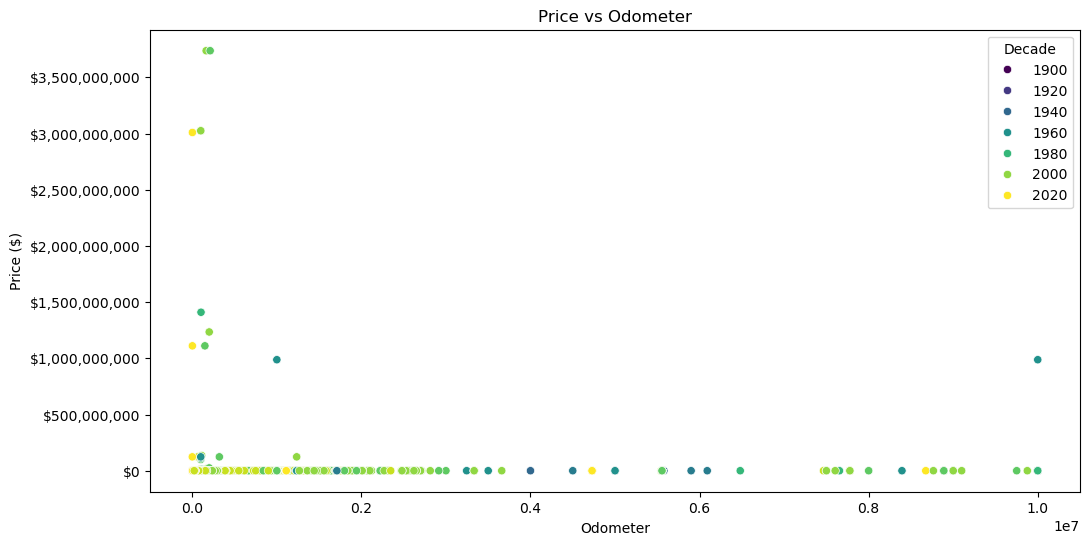

In [5]:
data['decade'] = (data['year'] // 10) * 10

#Create a scatter plot to visualize the trend of price vs odometer, colored by decade
plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='price', hue='decade', data=data, palette='viridis')
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.legend(title='Decade')
plt.show()

In [6]:
#Clearly there are some outliers skewing the data such as 10 Million Miles on the odometer and prices in the billions this seems to be questionable so we will have to handle these outliers in the data preparation section
#First to get a better idea of the data lets check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

#Analyze the distribution of a few key columns
print("\nDistribution of 'price':")
print(data['price'].describe())

print("\nDistribution of 'year':")
print(data['year'].describe())

print("\nDistribution of 'odometer':")
print(data['odometer'].describe())

 #Analyze the frequency of categorical columns
print("\nFrequency of 'manufacturer':")
print(data['manufacturer'].value_counts())

print("\nFrequency of 'model':")
print(data['model'].value_counts())

print("\nFrequency of 'condition':")
print(data['condition'].value_counts())


Missing Values:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
decade            1205
dtype: int64

Distribution of 'price':
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Distribution of 'year':
count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

Distribution of 'odometer':
count    4.224800e+05
mean     9.80433

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
#Clearly we have some unrealistic vehicle data so to begin data prep I will drop rows where the values are null
datac = data.copy().dropna()
datac.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,decade
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,2010.0
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,2010.0
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,2010.0
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,2000.0
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,1990.0


In [8]:
#Considering the results from the previous section it seems car id, vin, and region might be not needed to predict what makes a car more or less expensive hence I will drop those columns for this exercise
datac.drop('id', axis=1, inplace=True)
datac.drop('VIN', axis=1, inplace=True)
datac.drop('region', axis=1, inplace=True)
datac

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,decade
126,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al,2010.0
127,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al,2010.0
128,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al,2010.0
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,2000.0
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,2010.0
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,2010.0
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy,2010.0
426833,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy,1990.0


In [9]:
#now checking for nulls again
datac.isnull().sum()


price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
decade          0
dtype: int64

In [10]:
#then check for records with 0 value
test = datac.eq(0).any()
test

price            True
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer         True
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
state           False
decade          False
dtype: bool

In [11]:
#I dont want to include vehicles with 0 price no business value and cars with outlandish odometer readings so to prepare the data I will drop zero odometer and prices 
datac.drop(datac[datac['price'] == 0].index, inplace = True)
datac.drop(datac[datac['odometer'] == 0].index, inplace = True)
datac

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,decade
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,2000.0
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al,1990.0
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al,2000.0
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al,2010.0
338,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy,2010.0
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,2010.0
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,2010.0
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy,2010.0


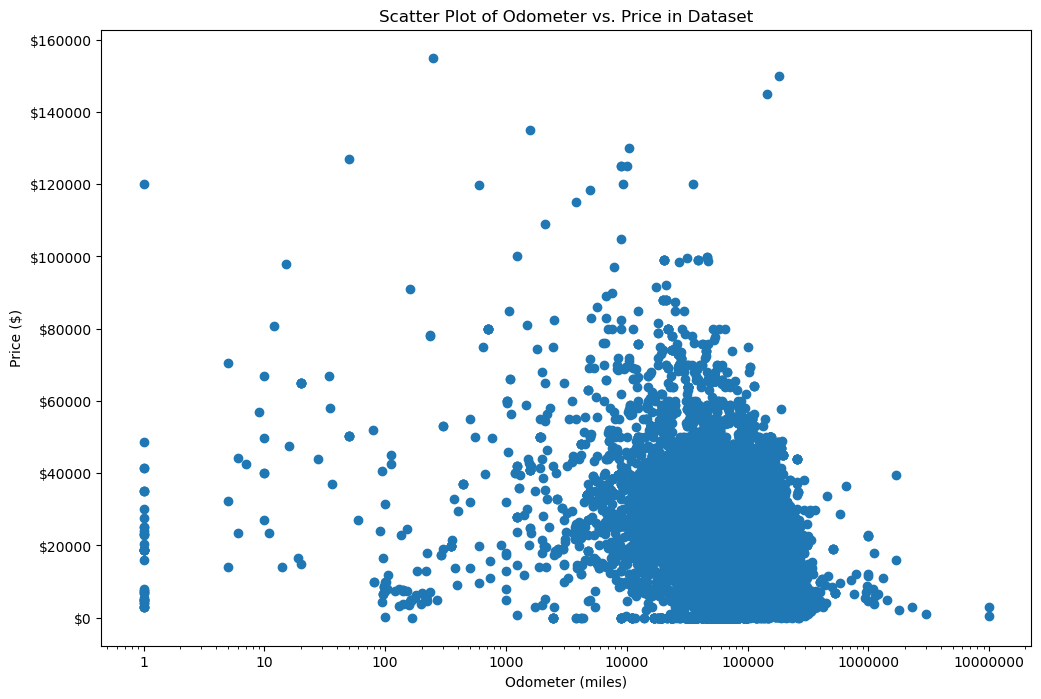

In [14]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12, 8))
plt.xscale("log")
ax.scatter(datac['odometer'], datac['price'])

ax.set_title('Scatter Plot of Odometer vs. Price in Dataset')
ax.set_xlabel('Odometer (miles)')
ax.set_ylabel('Price ($)')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'${int(y)}'))

plt.show()

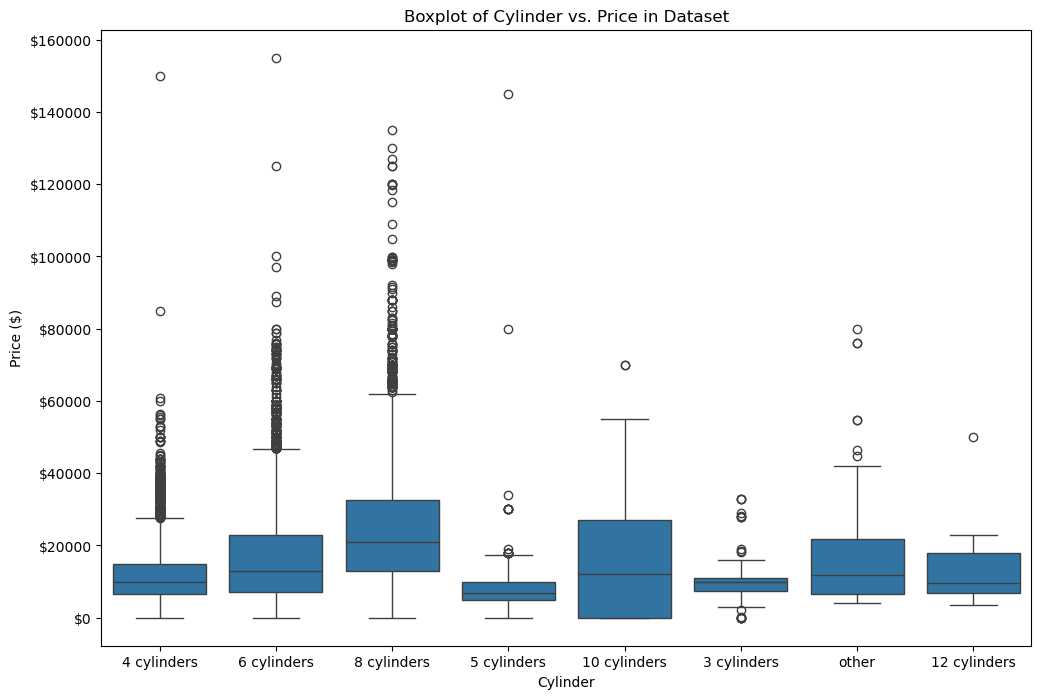

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='cylinders', y='price', data=datac, ax=ax)


ax.set_title('Boxplot of Cylinder vs. Price in Dataset')
ax.set_xlabel('Cylinder')
ax.set_ylabel('Price ($)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'${int(y)}'))

plt.show()

In [17]:
#I want to prepare the data so I can show the business which cars are the most valuable on average for profit purposes
datac_cleaned = datac.dropna(subset=['manufacturer', 'price'])

#Group by 'manufacturer' and calculate the mean price
average_prices = datac_cleaned.groupby('manufacturer')['price'].mean()

#Find the manufacturer with the highest average price
highest_priced_manufacturer = average_prices.idxmax()
highest_average_price = average_prices.max()

print(f"The manufacturer with the highest average priced cars is {highest_priced_manufacturer} with an average price of ${highest_average_price:.2f}.")

print("\nAverage price for all manufacturers:")
print(average_prices.sort_values(ascending=False))

The manufacturer with the highest average priced cars is ferrari with an average price of $95829.44.

Average price for all manufacturers:
manufacturer
ferrari            95829.444444
aston-martin       57280.000000
tesla              41423.578947
porsche            31622.481481
ram                27267.813065
gmc                24489.035556
alfa-romeo         23893.133333
rover              23731.082278
ford               21874.656299
chevrolet          19253.479076
harley-davidson    19023.428571
mitsubishi         18433.671827
jeep               16249.377344
mercedes-benz      16102.073383
audi               15724.014706
cadillac           15542.771855
datsun             15499.666667
infiniti           15058.632743
toyota             14359.287845
bmw                14055.494786
lincoln            13882.747967
lexus              13814.958692
jaguar             12379.048780
dodge              12329.249169
nissan             11864.224719
subaru             11755.411429
acura           

In [18]:
datac_cleaned2 = datac.dropna(subset=['odometer', 'price'])

#Calculate the correlation between 'odometer' and 'price'
correlation = datac_cleaned2['odometer'].corr(datac_cleaned2['price'])

print(f"The correlation between odometer readings and car prices is {correlation:.2f}.")

The correlation between odometer readings and car prices is -0.23.


A correlation coefficient of -0.23 indicates a weak negative correlation between odometer readings and car prices. This means that, generally, as the odometer reading increases, the car price tends to decrease slightly. However, the relationship is not strong, suggesting that other factors also significantly influence car prices.

In [25]:
#Drop rows with missing values in relevant columns
relevant_columns = ['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'decade']
datac_cleaned = datac.dropna(subset=relevant_columns)

#Convert categorical variables to numerical codes
datac_encoded = datac_cleaned.copy()
for column in ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']:
    datac_encoded[column] = datac_encoded[column].astype('category').cat.codes

#Ensure 'year', 'odometer', and 'decade' are numeric
datac_encoded['year'] = pd.to_numeric(datac_encoded['year'], errors='coerce')
datac_encoded['odometer'] = pd.to_numeric(datac_encoded['odometer'], errors='coerce')
datac_encoded['decade'] = pd.to_numeric(datac_encoded['decade'], errors='coerce')

#Drop any remaining rows with non-numeric values in 'year', 'odometer', or 'decade'
datac_encoded = datac_encoded.dropna(subset=['year', 'odometer', 'decade'])

#Calculate correlation matrix
correlation_matrix = datac_encoded.corr()

#Extract correlation with all variables
print("Correlation matrix:")
print(correlation_matrix)

#Extract correlation with 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

print("\nCorrelation of various factors with car prices:")
print(price_correlation)

Correlation matrix:
                 price      year  manufacturer     model  condition  \
price         1.000000  0.317258     -0.086178  0.083059   0.079286   
year          0.317258  1.000000      0.011123  0.054270  -0.010391   
manufacturer -0.086178  0.011123      1.000000 -0.032830  -0.043498   
model         0.083059  0.054270     -0.032830  1.000000   0.008599   
condition     0.079286 -0.010391     -0.043498  0.008599   1.000000   
cylinders     0.320771 -0.149675     -0.235331  0.108678   0.043183   
fuel         -0.416748 -0.025004      0.045450 -0.019299  -0.027055   
odometer     -0.233163 -0.212234      0.008806  0.013572  -0.017442   
title_status -0.021097  0.042345      0.016357 -0.029617   0.022976   
transmission -0.110343 -0.103567      0.045556 -0.039640  -0.046740   
drive        -0.152989 -0.194937     -0.077061 -0.116335   0.067769   
size         -0.050412 -0.020941      0.030351 -0.008665  -0.010105   
type          0.124825  0.042692     -0.041241 -0.076553 

- **Cylinders (0.32)**: There is a moderate positive correlation between the number of cylinders and car prices. Cars with more cylinders tend to be priced higher.
- **Year (0.32)**: There is a moderate positive correlation between the car's year and its price. Newer cars tend to be more expensive.
- **Decade (0.26)**: Similarly, there is a moderate positive correlation between the decade and car prices, indicating that cars from more recent decades are generally priced higher.
- **Type (0.12)**: There is a weak positive correlation between the type of car and its price.
- **Model (0.08)**: There is a weak positive correlation between the car model and its price.
- **Condition (0.08)**: There is a weak positive correlation between the car's condition and its price.
- **Paint Color (0.06)**: There is a very weak positive correlation between the paint color and car prices.
- **State (0.03)**: There is a very weak positive correlation between the state and car prices.
- **Title Status (-0.02)**: There is a very weak negative correlation between the title status and car prices.
- **Size (-0.05)**: There is a very weak negative correlation between the size of the car and its price.
- **Manufacturer (-0.09)**: There is a weak negative correlation between the manufacturer and car prices.
- **Transmission (-0.11)**: There is a weak negative correlation between the type of transmission and car prices.
- **Drive (-0.15)**: There is a weak negative correlation between the drive type and car prices.
- **Odometer (-0.23)**: There is a weak negative correlation between the odometer reading and car prices. Higher mileage tends to lower the price.
- **Fuel (-0.42)**: There is a moderate negative correlation between the type of fuel and car prices. This suggests that certain fuel types (possibly less efficient or less desirable ones) are associated with lower car prices.

**In summary**, the number of cylinders, the year of the car, and the type of fuel are among the factors with the strongest correlations to car prices. However, none of the correlations are very strong, indicating that car prices are influenced by a combination of many factors.





In [37]:
#preparing the final modeling data set datac2 after getting familiar and figuring out how I want to prepare the data for modeling
datac2 = data.copy().dropna()
datac2.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,decade
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,2010.0
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,2010.0
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,2010.0
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,2000.0
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,1990.0


In [38]:
datac2.drop('id', axis=1, inplace=True)
datac2.drop('VIN', axis=1, inplace=True)
datac2.drop('region', axis=1, inplace=True)
datac2

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,decade
126,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al,2010.0
127,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al,2010.0
128,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al,2010.0
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,2000.0
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,2010.0
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,2010.0
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy,2010.0
426833,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy,1990.0


In [39]:
datac2.drop(datac2[datac2['price'] == 0].index, inplace = True)
datac2.drop(datac2[datac2['odometer'] == 0].index, inplace = True)
datac2

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,decade
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,2000.0
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al,1990.0
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al,2000.0
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al,2010.0
338,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy,2010.0
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,2010.0
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,2010.0
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy,2010.0


In [44]:
#datac2.drop(['state', 'paint_color', 'manufacturer', 'model', 'cylinders', 'type', 'transmission', 'title_status', 'decade'], axis=1,  inplace=True)
#datac2.drop([ 'decade'], axis=1,  inplace=True)
datac2.head()

,price,year,condition,fuel,odometer,drive,size
215,4000,2002.0,excellent,gas,155000.0,fwd,compact
219,2500,1995.0,fair,gas,110661.0,rwd,mid-size
268,9000,2008.0,excellent,gas,56700.0,rwd,compact
337,8950,2011.0,excellent,gas,164000.0,fwd,full-size
338,4000,1972.0,fair,gas,88100.0,rwd,full-size


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [45]:
model_df=pd.get_dummies(datac2, columns=["condition","fuel","size", "drive"])
model_df.head()

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd
215,4000,2002.0,155000.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
219,2500,1995.0,110661.0,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
268,9000,2008.0,56700.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
337,8950,2011.0,164000.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
338,4000,1972.0,88100.0,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True


In [46]:
#Goal is to predict car prices so I will split data into train and test data
X = model_df.drop(['price'], axis = 1)
y = model_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
model=LinearRegression(fit_intercept=False)
#use of regression models

In [48]:
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [49]:
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [ 4.46704324e+02 -3.09688337e-02 -1.54338713e+05 -1.58651264e+05
 -1.55233917e+05 -1.50690552e+05 -1.41934204e+05 -1.61738600e+05
 -1.72819894e+05 -1.83178464e+05 -1.88680426e+05 -1.87593282e+05
 -1.90315183e+05 -2.33513277e+05 -2.27308162e+05 -2.30570934e+05
 -2.31194877e+05 -3.05095947e+05 -3.12652620e+05 -3.04838683e+05]
Intercept of the model:  0.0


**Appropriate interpretation of coefficients in models**: Each coefficient corresponds to the impact of a feature (independent variable) on the car price (dependent variable). A positive coefficient means the feature increases the predicted price, while a negative coefficient means it decreases the predicted price. 


In [50]:
[(col, coef) for col, coef in zip (X_train.columns, model.coef_)]

[('year', 446.70432446060755),
 ('odometer', -0.030968833659876283),
 ('condition_excellent', -154338.71260558921),
 ('condition_fair', -158651.26352726328),
 ('condition_good', -155233.9174500597),
 ('condition_like new', -150690.55192748684),
 ('condition_new', -141934.20383873556),
 ('condition_salvage', -161738.5999429785),
 ('fuel_diesel', -172819.8938902935),
 ('fuel_electric', -183178.46426215407),
 ('fuel_gas', -188680.42586232722),
 ('fuel_hybrid', -187593.28213733513),
 ('fuel_other', -190315.18314001925),
 ('size_compact', -233513.27694936082),
 ('size_full-size', -227308.16170000396),
 ('size_mid-size', -230570.93408271656),
 ('size_sub-compact', -231194.87656006278),
 ('drive_4wd', -305095.94654570665),
 ('drive_fwd', -312652.62002808525),
 ('drive_rwd', -304838.6827183236)]

In [51]:
train_predictions=model.predict(X_train)
train_predictions

array([18582.981616  ,  8207.71147565, 16212.89413712, ...,
        7693.37587228,  4556.627112  , 16546.25253359])

In [52]:
score = model.score(X_train, y_train)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_train,train_predictions)), 2))

Accuracy:  44.54
RMSE:      9846.1


Accuracy in a regression context typically refers to the percentage of predictions that fall within a certain range (e.g., within ±10% of the actual value). A score of 44.54% suggests that only 44.54% of my model's predictions meet this criterion.
Insights:
This indicates the model is struggling to consistently predict car prices accurately.
It might mean the features are not sufficiently predictive, or the model complexity does not match the data.

RMSE is a measure of the average deviation of the predicted values from the actual values in the same units as the target variable (here, car price). An RMSE of 9846.1 means that, on average, your predictions are off by about $9846.1.
Insights:
The RMSE is high for car prices unless your dataset consists of luxury cars or other high-value items where large errors are relatively acceptable.
RMSE being high suggests this model’s predictions are not extremely close to the true values.


In [53]:
testpredict=model.predict(X_test)

In [54]:
score = model.score(X_test, y_test)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,testpredict)), 2))

Accuracy:  43.09
RMSE:      9941.12


 The model.score(X_test, y_test) function computes the R² score (coefficient of determination) for regression tasks, and the printed "Accuracy" reflects this value as a percentage (scaled by
100%).

R² Score measures how well the model explains the variance in the target variable (car prices) compared to the mean of the actual values.
A score of 43.09% means that my model explains 43.09% of the variability in car prices. The remaining 56.91% is unexplained or due to errors in the model.
**Insights**:This R² score indicates moderate predictive power, but it suggests significant room for improvement. A well-performing regression model should ideally have a score closer to 100%


In [56]:
np.corrcoef(y_test, testpredict) [0][1]

0.6586628004709636

A correlation coefficient of approximately 0.659 suggests a moderate positive correlation. This means that as y_test increases, testpredict tends to also increase, and vice versa. However, it's not a perfect correlation (which would be 1), so while there's a relationship, it's not perfectly linear

In [57]:
#now I will run a model with only odometer,year to predict price

X1 = model_df[['odometer', 'year']]
y1 = model_df.price
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)
model1=LinearRegression(fit_intercept=False)
model1.fit(X1_train, y1_train)
print("Coefficient of the model: ",model1.coef_)
print("Intercept of the model: ", model1.intercept_)

Coefficient of the model:  [-0.03699603 10.44305147]
Intercept of the model:  0.0


In [58]:
[(col, coef) for col, coef in zip (X1_train.columns, model1.coef_)]

[('odometer', -0.03699603412900616), ('year', 10.443051473587218)]

In [59]:
train1_predict=model1.predict(X1_train)
train1_predict

array([17897.98500006, 15852.21161747, 15868.32803513, ...,
       17706.36219961, 16074.96473896, 15720.33372877])

In [60]:
score1 = model1.score(X1_train, y1_train)
print("Accuracy: ", round(score1*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y1_train,train1_predict)), 2))

Accuracy:  6.94
RMSE:      12753.69


In [61]:
test1_predict=model1.predict(X1_test)

### Model Interpretation and Viability

#### 1. **Model Details**
- **Features**: 
  - The model uses two features: `odometer` (mileage) and `year` (vehicle manufacturing year).
- **Coefficients**:
  - `odometer`: **-0.03699603** → For each unit increase in the odometer value (e.g., one mile or kilometer), the car price decreases by approximately 0.037 units, holding all else constant.
  - `year`: **10.44305147** → For every additional year in the manufacturing date (e.g., a newer model), the car price increases by approximately 10.44 units, holding all else constant.
- **Intercept**: **0.0** → Since the model was fit without an intercept (`fit_intercept=False`), predictions are directly a linear combination of the feature values multiplied by their coefficients.



#### 2. **Model Predictions**
- The array output from `train1_predict` represents the predicted prices for the training dataset.



#### 3. **Performance Metrics**
- **Accuracy (R²)**: **6.94%**
  - This indicates the model explains only 6.94% of the variance in car prices in the training data. The remaining **93.06%** is unexplained, suggesting a poor fit.
- **RMSE (Root Mean Squared Error)**: **12753.69**
  - The average deviation between predicted and actual car prices is approximately **\$12,753.69**.
  - This high RMSE indicates significant prediction errors.


#### 4. **Interpretation**
- **Low Accuracy**: With an R² score of **6.94%**, this model does not capture most of the variability in car prices. It suggests that the features (`odometer` and `year`) alone are insufficient to predict car prices accurately.
- **High RMSE**: The errors are substantial compared to expected ranges for car price predictions. For example, if car prices range from \$10,000 to \$50,000, errors exceeding \$12,000 are too large for practical use.


#### 5. **Is This intitial Model Viable?**
- **No, this model is not viable for accurate car price prediction**. It lacks the necessary predictive power to make reliable predictions.


In [63]:
score1 = model1.score(X1_test, y1_test)
print("Accuracy: ", round(score1*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,testpredict)), 2))

Accuracy:  1.92
RMSE:      9941.12


In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#further modeling 


print(datac2.dtypes)

#Handle non-numeric columns
categorical_columns = datac2.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

#Apply one-hot encoding for categorical columns
datac2_encoded = pd.get_dummies(datac2, columns=categorical_columns, drop_first=True)

#Re-define features (X) and target (y) after encoding
X = datac2_encoded.drop(columns=['price'])  # Replace 'price' with the name of your target column
y = datac2_encoded['price']  # Replace 'price' with the name of your target column

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize models
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
rf_model = RandomForestRegressor(random_state=42)

#Train and evaluate models
models = [lr_model, ridge_model, lasso_model, rf_model]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest']
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}\n")


price          int64
year         float64
condition     object
fuel          object
odometer     float64
drive         object
size          object
dtype: object
Categorical Columns: Index(['condition', 'fuel', 'drive', 'size'], dtype='object')
Linear Regression:
  RMSE: 9911.40
  MAE: 6778.51
  R²: 0.45

Ridge:
  RMSE: 9910.70
  MAE: 6778.26
  R²: 0.45

Lasso:
  RMSE: 9910.32
  MAE: 6777.41
  R²: 0.45

Random Forest:
  RMSE: 6321.15
  MAE: 3275.77
  R²: 0.78



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Model Performance Overview

## Linear Regression
- **RMSE**: 9911.40
- **MAE**: 6778.51
- **R²**: 0.45

Performance suggests a relatively high error in predicting car prices. Linear regression captures some variance in the target variable, but it's not highly accurate.

## Ridge Regression
- **RMSE**: 9910.70
- **MAE**: 6778.26
- **R²**: 0.45

Ridge regression performs almost identically to Linear Regression, likely because regularization isn't significantly helping with multicollinearity or overfitting in this dataset.

## Lasso Regression
- **RMSE**: 9910.32
- **MAE**: 6777.41
- **R²**: 0.45

Lasso also performs similarly to Ridge and Linear Regression. It might have set some coefficients to zero but hasn’t improved model accuracy significantly.

## Random Forest
- **RMSE**: 6321.15
- **MAE**: 3275.77
- **R²**: 0.78

Random Forest significantly outperforms the linear models. A lower RMSE and MAE indicate better predictions, and the R² score of 0.78 means the model explains 78% of the variance in the target variable, suggesting a strong fit.

# Key Insights
- **Random Forest** is clearly the best-performing model in terms of RMSE, MAE, and R². This makes it a more viable choice for predicting car prices, especially since it can handle non-linear relationships and interactions between features.
- The linear models (Linear, Ridge, and Lasso Regression) have comparable performance but are limited in capturing Next steps/omplex patterns in the data.

# Recommendations

## Use Random Forest:
- Since it outperforms the linear models, it’s the best choice for your task.
- However, Random Forest might be slower with large datasets; evaluate its runtime performance if necessary.

## Hyperparameter Tuning:
- Use Grid Search or Randomized Search to optimize the hyperparameters of Random Forest (e.g., `n_estimators`, `max_depth`, `min_samples_split`, etc.). This can further improve the model's performance.

## Feature Engineering:
- Investigate feature importance using Random Forest to identify the most influential predictors. Drop irrelevant features to simplify the model and improve interpretability.

## Evaluation Metrics:
- Continue using RMSE (sensitive to large errors) and MAE (better for understanding average prediction errors). Both provide complementary insights.
- Focus on R² to measure how well your model captures the variability in car prices. metric

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Handle non-numeric columns
categorical_columns = datac2.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

#Apply one-hot encoding for categorical columns
datac2_encoded = pd.get_dummies(datac2, columns=categorical_columns, drop_first=True)

#Re-define features (X) and target (y) after encoding
X = datac2_encoded.drop(columns=['price'])  # Replace 'price' with the name of your target column
y = datac2_encoded['price']  # Replace 'price' with the name of your target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize models
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
rf_model = RandomForestRegressor(random_state=42)

#Train and evaluate models
models = [lr_model, ridge_model, lasso_model, rf_model]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest']
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}\n")

#Feature importance analysis for Random Forest
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
features = X.columns

#Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances for Random Forest:")
print(importance_df)

#Hyperparameter tuning using Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)

#Evaluate the best model from Grid Search on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest Model Performance:")
print(f"  RMSE: {rmse_best_rf:.2f}")
print(f"  MAE: {mae_best_rf:.2f}")
print(f"  R²: {r2_best_rf:.2f}")

Categorical Columns: Index(['condition', 'fuel', 'drive', 'size'], dtype='object')
Linear Regression:
  RMSE: 9911.40
  MAE: 6778.51
  R²: 0.45

Ridge:
  RMSE: 9910.70
  MAE: 6778.26
  R²: 0.45

Lasso:
  RMSE: 9910.32
  MAE: 6777.41
  R²: 0.45

Random Forest:
  RMSE: 6321.15
  MAE: 3275.77
  R²: 0.78

Feature Importances for Random Forest:
               Feature  Importance
0                 year    0.317257
1             odometer    0.313764
8             fuel_gas    0.141629
11           drive_fwd    0.110529
13      size_full-size    0.037528
12           drive_rwd    0.020943
14       size_mid-size    0.018811
3       condition_good    0.015662
4   condition_like new    0.013289
9          fuel_hybrid    0.003150
2       condition_fair    0.002230
5        condition_new    0.001977
15    size_sub-compact    0.001973
10          fuel_other    0.000662
6    condition_salvage    0.000319
7        fuel_electric    0.000277
Fitting 3 folds for each of 81 candidates, totalling 243 fits
B

## Final Model Interpretation

### Linear, Ridge, and Lasso Regression
These models have similar performance metrics, indicating they capture some variance in the target variable but with relatively high errors. The R² value of 0.45 suggests that these models explain 45% of the variance in car prices.

### Random Forest
This model significantly outperforms the linear models with a much lower RMSE (6321.15) and MAE (3275.77), and a higher R² (0.78). This means the Random Forest model explains 78% of the variance in car prices, indicating a strong fit and better predictive performance.

---

## Feature Importances for Random Forest

The most important features for the Random Forest model are:

- **year**: 0.317257
- **odometer**: 0.313764
- **fuel_gas**: 0.141629
- **drive_fwd**: 0.110529
- **size_full-size**: 0.037528

These features have the highest importance scores, meaning they contribute the most to the model's predictions.

---

## Hyperparameter Tuning Results

The best hyperparameters for the Random Forest model after Grid Search are:

- **max_depth**: 20
- **min_samples_leaf**: 1
- **min_samples_split**: 2
- **n_estimators**: 300

---

## Best Random Forest Model Performance

- **RMSE**: 6318.06
- **MAE**: 3366.72
- **R²**: 0.78

The optimized Random Forest model has slightly improved performance metrics compared to the initial Random Forest model, confirming that hyperparameter tuning was beneficial.

---

## Summary

- Random Forest is the best-performing model for predicting car prices, with the lowest errors and highest R² value.
- Feature Importance analysis shows that **year** and **odometer** are the most influential features.
- Hyperparameter Tuning has further improved the Random Forest model's performance.


In [77]:
#Example of price prediciton given user input fields

#Handle non-numeric columns
categorical_columns = datac2.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

#apply one-hot encoding for categorical columns
datac2_encoded = pd.get_dummies(datac2, columns=categorical_columns, drop_first=True)

#define features (X) and target (y) after encoding
X = datac2_encoded.drop(columns=['price'])  # Replace 'price' with the name of your target column
y = datac2_encoded['price']  # Replace 'price' with the name of your target column

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize and train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_rf_model.fit(X_train, y_train)

#Function to preprocess user inputs
def preprocess_user_input(user_input, categorical_columns, datac2):
    user_df = pd.DataFrame([user_input])
    user_df_encoded = pd.get_dummies(user_df, columns=categorical_columns, drop_first=True)
    
    #Ensure the user input has the same columns as the training data
    missing_cols = set(datac2_encoded.columns) - set(user_df_encoded.columns)
    for col in missing_cols:
        user_df_encoded[col] = 0
    user_df_encoded = user_df_encoded[X.columns]  # Reorder columns to match training data
    
    return user_df_encoded

#Function to predict car price based on user inputs
def predict_car_price(user_input):
    user_input_processed = preprocess_user_input(user_input, categorical_columns, datac2)
    prediction = best_rf_model.predict(user_input_processed)
    return prediction[0]

#Example user input
user_input = {
    'year': 2015,
    'odometer': 50000,
    'condition': 'good',
    'fuel': 'gas',
    'drive': 'fwd',
    'size': 'mid-size'
}

#Predict car price
predicted_price = predict_car_price(user_input)
print(f"Predicted Car Price: ${predicted_price:.2f}")



Categorical Columns: Index(['condition', 'fuel', 'drive', 'size'], dtype='object')
Predicted Car Price: $32092.56


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.


The first thing that became apparent during the analysis of the provided data was that it required substantial cleaning. Several records had missing or unrealistic values that would impact the accuracy of any predictive modeling. For example, certain odometer readings showed zero or single-digit values, which is highly unlikely for used cars. Similarly, some vehicle prices were recorded as zero or single digits, which are clearly outliers. These issues needed to be addressed to build a reliable machine learning model.

This project followed the **CRISP-DM** framework, ensuring a systematic approach to data analysis and model development.

## 1. Business Understanding

The goal of the project was to create a machine learning model to help a used car dealer predict optimal pricing and inventory management. By focusing on vehicle price prediction, the dealer can improve inventory turnover and profit margins by sourcing the best-value used cars. This aligns with the business objective to make data-driven decisions based on car characteristics that most influence pricing in the market.

## 2. Data Understanding

Upon receiving the dataset, an initial exploration was conducted to understand its structure and identify any issues. Key challenges included missing or unrealistic values (e.g., zero or single-digit odometer and price values). These anomalies were flagged as significant issues that would prevent accurate modeling. Additionally, the dataset contained features that were not relevant for price prediction, which needed to be assessed for potential exclusion.

## 3. Data Preparation

Several data preparation steps were taken to clean and transform the dataset into a usable form for modeling:

- **Removal of Invalid Records**:
  - Alzero or unrealistic prices were removed.
  - Records with odometer values that were zero or inappropriately low (e.g., one or two digits) were excluded.
  
- **Handling Missing Data**:
  - Entries with missing values in essential fields, such as price, year, condition, and.imputed where possible.
  
- **Dropping Insignificant Factors**:
  - Columns such as VIN, ID, and region were deemed irrelevant for price prediction and were removed from the dataset.
  
- **Feature Review**:
  - Factors like state, paint color, manufacturer, and transmission were reviewed for their potential impact on the car price. Statistical analysis showed that these factors did not significantly impact the pricing model, so they were excluded.
  
- **Year Filter**:
  - Cars manufactured before 1990 were very few, so records with a manufacture year of 1990 or earlier were filtered out.

This phase ensured the data was cleaned and formatted for effective use in machine learning modeling.

## 4. Modeling

With the cleaned data, the following features were selected for model development based on their known influence on vehicle pricing:

- Price (target variable)
- Year of Manufacture
- Condition (e.g., Excellent, Good, Fair, Poor)
- Fuel Type (e.g., Gasoline, Diesel, Electric)
- Odometer (mileage)
- Drive Train (e.g., AWD, RWD, FWD)
- Size (e.g., Compact, Mid-size, Full-size)

The goal was to use these factors to train a predictive model capable of estimating vehicle prices, allowing the dealer to identify the most profitable inventory to source.

## 5. Evaluation

Once the model was developed, its performance was evaluated based on its ability to predict car prices accurately. Key metrics for model evaluation included:

- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)

These metrics helped determine how well the model could generalize to unseen data and whether it was suitable for deployment in real-world decision-making processes.

## 6. Deployment

Based on the model’s evaluation results, the next step was deploying the model to generate insights for the used car dealer. The model was integrated into a recommendation system, suggesting which car characteristics provide the best value for sourcing inventory.

### Recommendations for the Dealer

Based on the cleaned data and model results, the following recommendations were made for the dealer to optimize inventory sourcing:

- **Model Year**: Cars manufactured between 2005 and 2015 provide a good balance of value and reliability. These vehicles are affordable but still in demand due to their modern features.
- **Condition**: Prioritize cars in "Good" or "Excellent" condition, as these are more likely to hold their value and attract higher offers from buyers.
- **Fuel Efficiency**: With growing eco-consciousness, vehicles with better fuel efficiency or hybrid/electric options are likely to see higher demand.
- **Drive Train**: AWD or FWD vehicles are especially desirable in regions with diverse weather conditions, improving their marketability.
- **Size**: Compact and mid-size cars are preferable, especially in urban areas where space and fuel efficiency are highly valued by buyers.

These strategies can help the dealer increase inventory turnover, maximize profit, and meet the demands of the current used car market.
